In [ ]:
pip install pandas

In [29]:
import requests
import os
from typing import Optional

BASE_URL = "https://data.insideairbnb.com/united-states/ma/boston/"

def download_file(url: str, save_path: str):
    """
    Downloads a file from a URL to a specified path.

    Args:
        url (str): The URL of the file to download.
        save_path (str): The local path to save the downloaded file.

    Returns:
        Optional[str]: The path of the downloaded file if successful, otherwise None.
    """
 
    try:
        print(f"Attempting to download {url}...")
        resp = requests.get(url)
        resp.raise_for_status()

        with open(save_path, "wb") as f:
            for chunk in resp.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Successfully downloaded to {save_path}")
        return save_path
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}. Error: {e}")
        return None

#dates could change depending...
def main(dates = ["2024-09-18", "2024-12-20", "2025-03-15", "2025-06-19"]):
    """
    Downloads historical and current employment data files from the BLS website.
    """
    # Define the directory for saving files
    current_path = os.getcwd()# Get the current working directory
    project_path = current_path.replace('/src/pipeline', '')
    raw_data_dir = project_path + '/data/raw'
    
    # Download data
    print("--- Downloading Airbnb data ---")
    for date in dates:
        url = f"{BASE_URL}{date}/visualisations/listings.csv"
        filename = f"listings_{date}.csv"
        save_path = os.path.join(raw_data_dir, filename)

        try:
            download_file(url, save_path)
        except requests.exceptions.RequestException as e:
            # Handle cases where the file for a specific date is not available
            print(f"Warning: File for date {date} was not found or could not be downloaded. Continuing to next date.")

if __name__ == "__main__":
    main()

--- Downloading Airbnb data ---
Attempting to download https://data.insideairbnb.com/united-states/ma/boston/2024-09-18/visualisations/listings.csv...
Successfully downloaded to /Users/dili/Documents/indeed-analysis/data/raw/listings_2024-09-18.csv
Attempting to download https://data.insideairbnb.com/united-states/ma/boston/2024-12-20/visualisations/listings.csv...
Successfully downloaded to /Users/dili/Documents/indeed-analysis/data/raw/listings_2024-12-20.csv
Attempting to download https://data.insideairbnb.com/united-states/ma/boston/2025-03-15/visualisations/listings.csv...
Successfully downloaded to /Users/dili/Documents/indeed-analysis/data/raw/listings_2025-03-15.csv
Attempting to download https://data.insideairbnb.com/united-states/ma/boston/2025-06-19/visualisations/listings.csv...
Successfully downloaded to /Users/dili/Documents/indeed-analysis/data/raw/listings_2025-06-19.csv


  Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


### Data cleaning

In [60]:
import pandas as pd
import os 

dates = ["2024-09-18", "2024-12-20", "2025-03-15", "2025-06-19"]
current_path = os.getcwd()# Get the current working directory
project_path = current_path.replace('/src/pipeline', '')
raw_data_path = project_path + '/data/raw'
processed_data_path = project_path + '/data/processed' #to save the cleaned data


df = pd.read_csv(raw_data_path+"/listings_2024-09-18.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125.0,29,26,2024-08-09,0.23,1,199,2,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,142.0,3,128,2024-08-29,0.68,10,65,9,STR-490093
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,171.0,3,132,2024-08-18,0.72,10,58,7,STR-491702
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,125.0,91,29,2024-05-15,0.24,4,140,2,NaN
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,NaN,Back Bay,42.35173,-71.08685,Entire home/apt,130.0,91,9,2019-07-22,0.09,13,228,0,NaN


In [61]:
df = df.drop(columns=['license', 'neighbourhood_group']) #drop irrelatant columns
#df.dropna(subset=list(df.columns), inplace=True) #drop observations if any value is Nan
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.36413,-71.02991,Entire home/apt,125.0,29,26,2024-08-09,0.23,1,199,2
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,Roxbury,42.32844,-71.09581,Entire home/apt,142.0,3,128,2024-08-29,0.68,10,65,9
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,Roxbury,42.32802,-71.09387,Entire home/apt,171.0,3,132,2024-08-18,0.72,10,58,7
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,Beacon Hill,42.35867,-71.06307,Entire home/apt,125.0,91,29,2024-05-15,0.24,4,140,2
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,Back Bay,42.35173,-71.08685,Entire home/apt,130.0,91,9,2019-07-22,0.09,13,228,0


In [62]:
def clean_airbnb_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean Airbnb dataset by removing invalid rows instead of capping values.

    Drops rows where:
      - price < 0
      - minimum_nights > 365
      - availability_365 > 365 or < 0
    """
    df = df.copy()

    # Ensure correct dtypes
    df["id"] = pd.to_numeric(df["id"], errors="coerce").astype("Int64")
    df["host_id"] = pd.to_numeric(df["host_id"], errors="coerce").astype("Int64")
    df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")

    numeric_cols = [
        "latitude", "longitude", "price", "minimum_nights",
        "number_of_reviews", "reviews_per_month",
        "calculated_host_listings_count", "availability_365",
        "number_of_reviews_ltm"
    ]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # --- Drop weird data points ---
    before = len(df)

    df = df[df["price"] >= 0]                          # no negative prices
    df = df[df["minimum_nights"].between(1, 365)]      # reasonable stays only
    df = df[df["availability_365"].between(0, 365)]    # within a year

    after = len(df)
    print(f"Dropped {before - after} invalid rows (from {before} → {after})")
    return df

clean_df = clean_airbnb_data(df)

clean_df.describe()


Dropped 771 invalid rows (from 4293 → 3522)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3522.0,3522.0,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,2777,2777.000000,3522.000000,3522.000000,3522.000000
mean,534451219638308224.0,180514307.833333,42.337606,-71.082641,249.607609,22.451448,53.787905,2024-02-20 09:27:17.306445568,2.027281,57.231119,222.067007,14.409426
min,3781.0,4804.0,42.235300,-71.174020,26.000000,1.000000,0.000000,2015-06-20 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,40311969.5,23343633.75,42.324308,-71.096013,110.250000,1.000000,1.000000,2024-04-28 00:00:00,0.380000,3.000000,136.000000,0.000000
50%,669236894142597120.0,107434423.0,42.344325,-71.075908,213.000000,5.000000,13.000000,2024-08-20 00:00:00,1.320000,10.000000,247.000000,3.000000
75%,1004606886058867968.0,297860058.0,42.353404,-71.061900,312.000000,30.000000,60.000000,2024-09-03 00:00:00,3.130000,59.000000,319.000000,22.000000
max,1247325200525486336.0,650408078.0,42.391317,-70.996000,4786.000000,250.000000,1019.000000,2024-09-18 00:00:00,24.070000,355.000000,365.000000,284.000000
std,482885987297403840.0,169932717.234972,0.026086,0.032295,213.807749,28.967169,98.730091,NaN,2.169697,101.450766,106.530925,22.229251


Text(0, 0.5, 'Count')

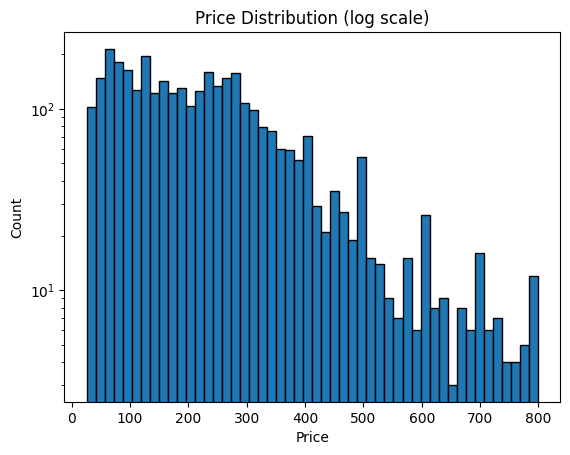

In [79]:
import matplotlib.pyplot as plt
  
# --- 1. Price distribution ---
plt.figure()
df[df["price"]<800].price.plot(kind="hist", bins=50, edgecolor="black", log=True)
plt.title("Price Distribution (log scale)")
plt.xlabel("Price")
plt.ylabel("Count")

In [76]:
df["price"].describe()

count    3522.000000
mean      249.607609
std       213.807749
min        26.000000
25%       110.250000
50%       213.000000
75%       312.000000
max      4786.000000
Name: price, dtype: float64

In [80]:
df["room_type"].value_counts()

room_type
Entire home/apt    2913
Private room       1321
Hotel room           48
Shared room          11
Name: count, dtype: int64

Text(0, 0.5, 'Count')

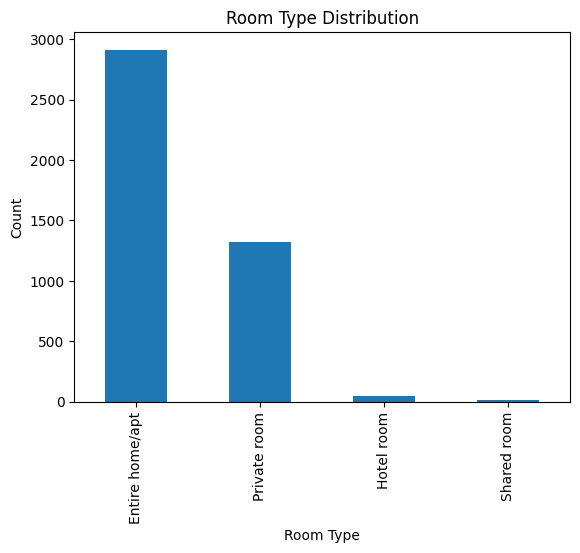

In [81]:
room_counts = df["room_type"].value_counts()
plt.figure()
room_counts.plot(kind="bar")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")

Text(0, 0.5, 'Latitude')

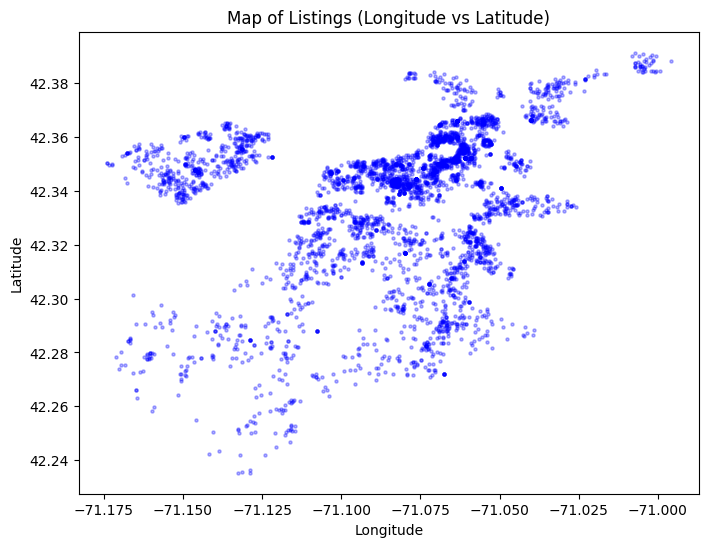

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], 
            alpha=0.3, s=5, c="blue")
plt.title("Map of Listings (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [83]:
#pip install geopandas shapely contextily

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 159.2 kB/s  0:00:08eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 25.9 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 20.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [contextily]5 [geopandas]lib]
Note: you may need to restart the kernel to use updated packages.


AttributeError: Stamen

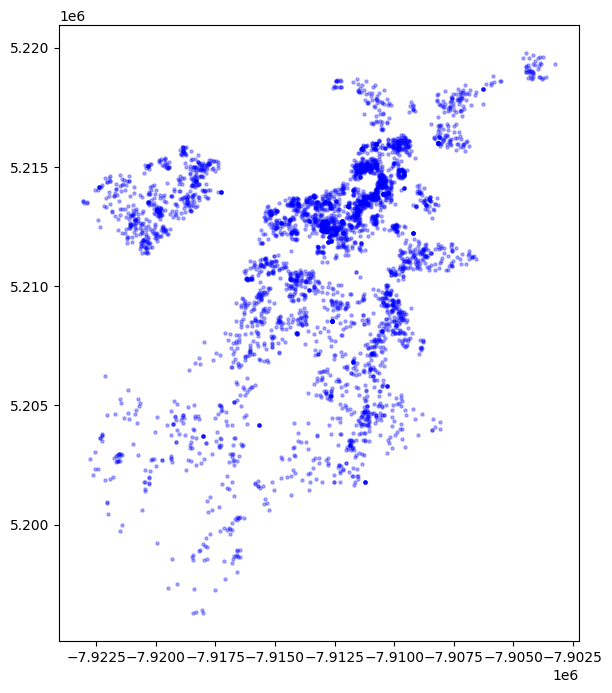

In [84]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

def plot_boston_map(df):
    """
    Plot Airbnb listings on top of a basemap of Boston using longitude & latitude.
    """
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df, geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])],
        crs="EPSG:4326"  # WGS84 (lat/lon)
    )

    # Project to web mercator (needed for contextily basemap)
    gdf = gdf.to_crs(epsg=3857)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf.plot(ax=ax, markersize=5, alpha=0.3, color="blue")

    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    # Style
    ax.set_title("Airbnb Listings in Boston", fontsize=14)
    ax.set_axis_off()  # hide lat/long tick
    plt.close()

plot_boston_map(df)

    